In [ ]:
#Handwritten digit classification using deeplearning
#The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples.
#The digits have been size-normalized and centered in a fixed-size image.


In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


tf.__version__

'2.0.0-beta1'

In [3]:
#Get the MNIST dataset 
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [13]:
#Normalise the data
x_train,x_test = tf.keras.utils.normalize(x_train, axis=1), tf.keras.utils.normalize(x_test, axis=1)


In [15]:
#Use a sequential model to train the data
model = tf.keras.models.Sequential()


In [16]:
#First layer to get a row
model.add(tf.keras.layers.Flatten())
#3 hidden layers
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(200, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
#Output layer with 10 nodes since 10 digits classes [0-9]
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


In [18]:
#compile and fit the model
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model.fit(x_train, y_train, epochs=5)

W0811 20:47:37.612005 4570297792 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2577 - accuracy: 0.9219
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1092 - accuracy: 0.9659
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0760 - accuracy: 0.9759
Epoch 4/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0593 - accuracy: 0.9811
Epoch 5/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0476 - accuracy: 0.9843


In [19]:
#Test the model
_, accuracy = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(accuracy)


10000/10000 [==============================] - 1s 66us/sample - loss: 0.0945 - accuracy: 0.9728
0.9728


In [21]:
#Get predictions 
results=model.predict(x_test)
print(results)

[[1.6894478e-12 2.2589630e-09 6.6330600e-08 ... 9.9999762e-01
  6.6494316e-10 5.7164269e-09]
 [6.4104883e-10 1.3364608e-05 9.9998653e-01 ... 1.0033053e-07
  7.9122930e-09 2.2936215e-10]
 [2.9085300e-07 9.9989665e-01 6.1954242e-06 ... 1.3052227e-05
  4.9020568e-05 1.1728578e-06]
 ...
 [1.7980868e-10 9.1595054e-10 5.5571320e-10 ... 5.6695391e-09
  2.0463402e-10 6.8326614e-07]
 [3.2305419e-08 3.5486417e-10 1.5610711e-08 ... 6.9570696e-09
  1.4772380e-05 1.4933615e-09]
 [1.1597914e-07 1.6235388e-08 9.5036523e-10 ... 1.1132690e-11
  4.8731700e-08 4.3057774e-08]]


In [23]:
#Get the index of the max probabilty for each image. Above matrix represents class probability distributions
#numpy.argmax(a, axis=None, out=None)[source] Returns the indices of the maximum values along an axis.

for _ in range(5):
    print(np.argmax(results[_]))



7
2
1
0
4


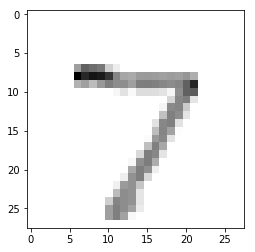

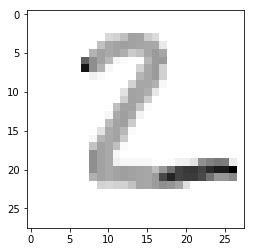

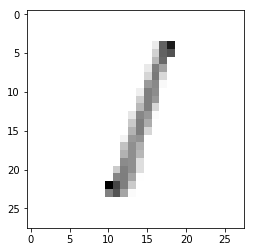

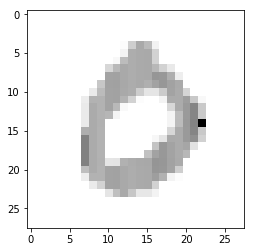

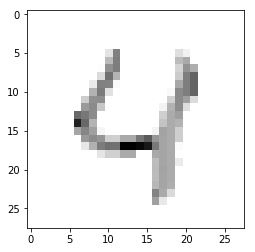

In [24]:
#See the actual impage of the results

for _ in range(5):
    plt.imshow(x_test[_],cmap=plt.cm.binary)
    plt.show()
